- Setting Up the API key
- Pulling Data with Pandas
- Data Cleaning and Preprocessing
- Building the Trading Strtegy
- Backtesting 
- Evaluation and Optimisation

In [2]:
!pip install ccxt

     ---------------------------------------- 3.4/3.4 MB 8.3 MB/s eta 0:00:00
     ---------------------------------------- 2.4/2.4 MB 8.2 MB/s eta 0:00:00
     ---------------------------------------- 76.3/76.3 kB 4.4 MB/s eta 0:00:00
     -------------------------------------- 179.1/179.1 kB 5.4 MB/s eta 0:00:00
     -------------------------------------- 118.7/118.7 kB 7.2 MB/s eta 0:00:00


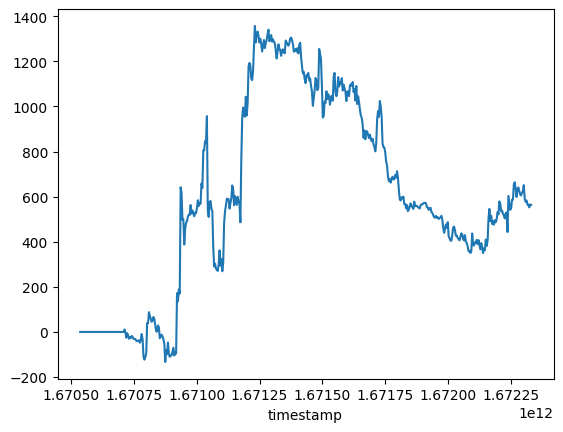

In [4]:
import ccxt
import pandas as pd

# Initialize the Binance API client
binance = ccxt.binance()

# Set the symbol and timeframe for the data
symbol = 'BTC/USDT'
timeframe = '1h'

# Fetch the data from the API
data = binance.fetch_ohlcv(symbol, timeframe)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Create a simple moving average (SMA) indicator with a window of 50 periods
df['sma'] = df['close'].rolling(50).mean()

# Create a trading strategy that buys when the close price crosses above the SMA and sells when it crosses below
df['signal'] = 0
df.loc[df['close'] > df['sma'], 'signal'] = 1
df.loc[df['close'] < df['sma'], 'signal'] = -1

# Calculate the profit or loss of the strategy
df['profit'] = df['signal'].shift(1) * (df['close'] - df['close'].shift(1))

# Calculate the cumulative sum of the profit/loss
df['cumulative'] = df['profit'].cumsum()

# Plot the cumulative sum of the profit/loss
df['cumulative'] = df['profit'].cumsum()

# Plot the cumulative sum of the profit/loss
df['cumulative'].plot();

<AxesSubplot: xlabel='timestamp'>

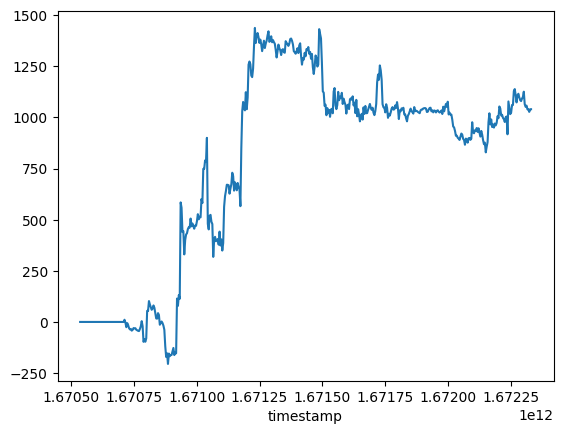

In [6]:
import ccxt
import pandas as pd

# Initialize the Binance API client
binance = ccxt.binance()

# Set the symbol and timeframe for the data
symbol = 'BTC/USDT'
timeframe = '1h'

# Fetch the data from the API
data = binance.fetch_ohlcv(symbol, timeframe)

# Convert the data to a Pandas DataFrame
df = pd.DataFrame(data, columns=['timestamp', 'open', 'high', 'low', 'close', 'volume'])

# Set the 'timestamp' column as the index
df.set_index('timestamp', inplace=True)

# Calculate the fast MA with a window of 10 periods
df['fast_ma'] = df['close'].rolling(10).mean()

# Calculate the slow MA with a window of 50 periods
df['slow_ma'] = df['close'].rolling(50).mean()

# Create a trading strategy that buys when the fast MA crosses above the slow MA and sells when it crosses below
df['signal'] = 0
df.loc[df['fast_ma'] > df['slow_ma'], 'signal'] = 1
df.loc[df['fast_ma'] < df['slow_ma'], 'signal'] = -1

# Calculate the profit or loss of the strategy
df['profit'] = df['signal'].shift(1) * (df['close'] - df['close'].shift(1))

# Calculate the cumulative sum of the profit/loss
df['cumulative'] = df['profit'].cumsum()

# Plot the cumulative sum of the profit/loss
df['cumulative'].plot()